# Neural Network Classifier - Breast Cancer

In [12]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

cancer = datasets.load_breast_cancer()
print(f"Features: {cancer.feature_names}")
print("")
print(f"Target: {cancer.target_names}")

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: ['malignant' 'benign']


In [14]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# 0: malignant (bad), 1: benign (Not bad)

df["target"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Scaler

In [15]:
columns_to_scale = cancer.feature_names

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

## Data Split

In [16]:
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (455, 30)
Test: (114, 30)


## Hyperparameter Tunning

In [17]:
t0 = time.time()

parameters = {
    'hidden_layer_sizes': [(20,), (20, 10,), (10, 10,), (5, 5, 5,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.001],
    'solver': ['sgd', 'adam'],
    'max_iter': [50, 100, 200]
}
estimator = MLPClassifier(random_state=42,
                          n_iter_no_change=100,
                          early_stopping=True)

clf = RandomizedSearchCV(estimator = estimator,
                         param_distributions = parameters,
                         n_iter=50,
                         cv=10,
                         n_jobs = -1,
                         verbose=True)
clf.fit(X,y)

t1 = time.time()
print(f"Processing time: {t1-t0:.5f}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/

Processing time: 4.47237


/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/s

In [9]:
clf.best_params_

{'solver': 'adam',
 'max_iter': 50,
 'learning_rate_init': 0.01,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (5, 5, 5),
 'activation': 'logistic'}

In [10]:
clf.best_score_

0.9788847117794486

In [11]:
model = clf.best_estimator_
model

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(5, 5, 5), learning_rate_init=0.01,
              max_iter=50, n_iter_no_change=100, random_state=42)

## Training

In [54]:
# Fitting model based on the train data
model = MLPClassifier(random_state=42,
                      n_iter_no_change=100,
                      early_stopping=True,
                      verbose=True,
                      **clf.best_params_).fit(X_train, y_train)

Iteration 1, loss = 0.66082090
Validation score: 0.630435
Iteration 2, loss = 0.65808269
Validation score: 0.630435
Iteration 3, loss = 0.65724670
Validation score: 0.630435
Iteration 4, loss = 0.65570345
Validation score: 0.630435
Iteration 5, loss = 0.65408251
Validation score: 0.630435
Iteration 6, loss = 0.65025703
Validation score: 0.630435
Iteration 7, loss = 0.64538362
Validation score: 0.630435
Iteration 8, loss = 0.63938909
Validation score: 0.630435
Iteration 9, loss = 0.63283328
Validation score: 0.630435
Iteration 10, loss = 0.62556946
Validation score: 0.630435
Iteration 11, loss = 0.61734765
Validation score: 0.630435
Iteration 12, loss = 0.60779109
Validation score: 0.630435
Iteration 13, loss = 0.59659459
Validation score: 0.630435
Iteration 14, loss = 0.58382723
Validation score: 0.630435
Iteration 15, loss = 0.56934343
Validation score: 0.630435
Iteration 16, loss = 0.55371274
Validation score: 0.630435
Iteration 17, loss = 0.53505635
Validation score: 0.630435
Iterat

/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


## Evaluation

In [55]:
model.score(X_train, y_train)

0.9824175824175824

In [56]:
model.score(X_test, y_test)

0.9824561403508771

### Confusion Matrix

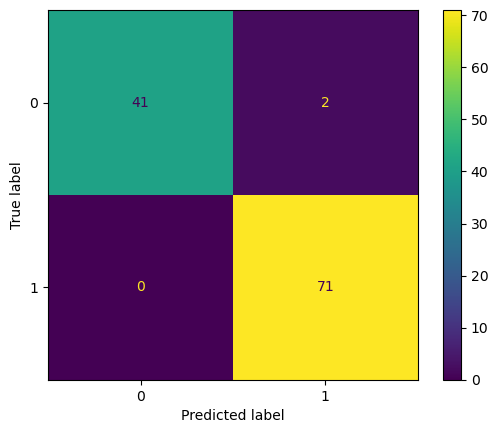

/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ai/lib/python3.8/si

In [57]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()